In [1]:
#Import all the necessary modules.
import pandas  as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt

import numpy as np

In [2]:
#Read the csv data set for Corona Virus.

Cor = pd.read_csv('2019_nC0v_20200121_20200126 - SUMMARY.csv')

Cor

,Province/State,Country,Date last updated,Confirmed,Suspected,Recovered,Deaths
0,Shanghai,Mainland China,1/21/2020,9.0,10.0,NaN,NaN
1,Yunnan,Mainland China,1/21/2020,1.0,NaN,NaN,NaN
2,Beijing,Mainland China,1/21/2020,10.0,NaN,NaN,NaN
3,Taiwan,Mainland China,1/21/2020,1.0,NaN,NaN,NaN
4,Jilin,Mainland China,1/21/2020,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...
363,NaN,France,1/26/2020 11:00 AM,3.0,NaN,NaN,NaN
364,NaN,Australia,1/26/2020 11:00 AM,4.0,NaN,NaN,NaN
365,NaN,Nepal,1/26/2020 11:00 AM,1.0,NaN,NaN,NaN
366,NaN,Malaysia,1/26/2020 11:00 AM,4.0,NaN,NaN,NaN


In [3]:
read = Cor[['Country', 'Confirmed', 'Suspected', 'Deaths', 'Recovered']]
read

,Country,Confirmed,Suspected,Deaths,Recovered
0,Mainland China,9.0,10.0,NaN,NaN
1,Mainland China,1.0,NaN,NaN,NaN
2,Mainland China,10.0,NaN,NaN,NaN
3,Mainland China,1.0,NaN,NaN,NaN
4,Mainland China,NaN,1.0,NaN,NaN
...,...,...,...,...,...
363,France,3.0,NaN,NaN,NaN
364,Australia,4.0,NaN,NaN,NaN
365,Nepal,1.0,NaN,NaN,NaN
366,Malaysia,4.0,NaN,NaN,NaN


In [4]:
group = read.sort_index(by = ['Confirmed'], ascending=False)
DataFrame(group)

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


,Country,Confirmed,Suspected,Deaths,Recovered
322,Mainland China,1058.0,NaN,52.0,42.0
278,Mainland China,1052.0,NaN,52.0,42.0
234,Mainland China,761.0,NaN,40.0,32.0
190,Mainland China,729.0,NaN,39.0,32.0
111,Mainland China,549.0,NaN,24.0,31.0
...,...,...,...,...,...
108,Mexico,NaN,1.0,NaN,NaN
109,Brazil,NaN,1.0,NaN,NaN
110,Colombia,NaN,1.0,NaN,NaN
181,Mainland China,NaN,1.0,NaN,NaN


In [5]:
drop = group.drop(['Suspected'], axis=1)
dropping = drop.dropna(axis=0, subset=['Confirmed'])
dropping

,Country,Confirmed,Deaths,Recovered
322,Mainland China,1058.0,52.0,42.0
278,Mainland China,1052.0,52.0,42.0
234,Mainland China,761.0,40.0,32.0
190,Mainland China,729.0,39.0,32.0
111,Mainland China,549.0,24.0,31.0
...,...,...,...,...
312,US,1.0,NaN,NaN
311,US,1.0,NaN,NaN
310,Mainland China,1.0,NaN,NaN
231,Australia,1.0,NaN,NaN


In [6]:
grouping = dropping.groupby(['Country'], as_index=False).sum()
grouping

,Country,Confirmed,Deaths,Recovered
0,Australia,13.0,0.0,0.0
1,Canada,1.0,0.0,0.0
2,France,14.0,0.0,0.0
3,Hong Kong,29.0,0.0,0.0
4,Japan,18.0,0.0,1.0
5,Macau,17.0,0.0,0.0
6,Mainland China,10056.0,265.0,275.0
7,Malaysia,13.0,0.0,0.0
8,Nepal,4.0,0.0,0.0
9,Singapore,18.0,0.0,0.0


In [7]:
re_index = grouping.reindex(columns=['Country','Confirmed','Deaths','Recovered'])
re_index

,Country,Confirmed,Deaths,Recovered
0,Australia,13.0,0.0,0.0
1,Canada,1.0,0.0,0.0
2,France,14.0,0.0,0.0
3,Hong Kong,29.0,0.0,0.0
4,Japan,18.0,0.0,1.0
5,Macau,17.0,0.0,0.0
6,Mainland China,10056.0,265.0,275.0
7,Malaysia,13.0,0.0,0.0
8,Nepal,4.0,0.0,0.0
9,Singapore,18.0,0.0,0.0


In [8]:
re_index['Confirmed'] = re_index['Confirmed'].replace('0.0', np.nan)
re_index_ = re_index.dropna(axis=0, subset=['Confirmed'])
re_index_

,Country,Confirmed,Deaths,Recovered
0,Australia,13.0,0.0,0.0
1,Canada,1.0,0.0,0.0
2,France,14.0,0.0,0.0
3,Hong Kong,29.0,0.0,0.0
4,Japan,18.0,0.0,1.0
5,Macau,17.0,0.0,0.0
6,Mainland China,10056.0,265.0,275.0
7,Malaysia,13.0,0.0,0.0
8,Nepal,4.0,0.0,0.0
9,Singapore,18.0,0.0,0.0


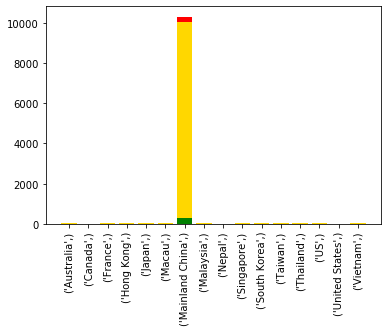

In [9]:
A = list(re_index['Confirmed'])
B = list(re_index['Deaths'])
C = list(re_index['Recovered'])
count = [tuple(x) for x in re_index[['Country']].values]
c = np.arange(len(count)) 

plt.bar(c, [int(x) for x in A], align='center', color='gold', bottom=B)
plt.bar(c, [int(x) for x in B], align='center', color='r', bottom= A)
plt.bar(c, [int(x) for x in C], align='center', color='g')
plt.xticks(c, count, rotation=90)
plot = plt.show()
plot

where;  Green = Recovered, 
        Gold = Confirmed, 
        Red = Deaths

From the visualization, it can be deduced that;

1. Mainland China is the most devastated country with the highest numbers of confirmed infections.
2. Canada , Nepal and  United States, compared to Mainland China, have little to no confirmed infections.
3. Only Mainland China has any recorded Deaths or Recovery, however, infected persons in other countries have neither died nor recovered. 

In [10]:
mc = re_index_[6:7]
mc

,Country,Confirmed,Deaths,Recovered
6,Mainland China,10056.0,265.0,275.0


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


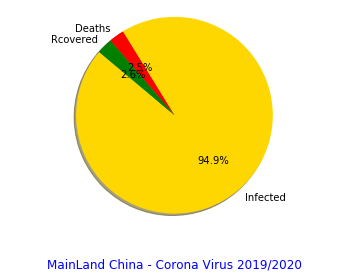

In [11]:
c = list(mc['Confirmed'])
d = list(mc['Deaths'])
r = list(mc['Recovered'])

labels = ['Infected', 'Deaths', 'Rcovered']
colors = ['gold', 'r', 'g']
sizes = [c, d, r]

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.xlabel('\n\nMainLand China - Corona Virus 2019/2020', color='b', fontsize = 12)

plt.axis('equal')
plt.show()

From the pie chart above, Of those confirmed to be infected with CoronaVirus in Mainland China;
1. 2.5% died,
2. 2.6% recovered,
3. While 94.9% still remain infected.

In [12]:
re_index_.to_csv('Task3.csv', encoding='utf-8')
pd.read_csv('Task3.csv')

,Unnamed: 0,Country,Confirmed,Deaths,Recovered
0,0,Australia,13.0,0.0,0.0
1,1,Canada,1.0,0.0,0.0
2,2,France,14.0,0.0,0.0
3,3,Hong Kong,29.0,0.0,0.0
4,4,Japan,18.0,0.0,1.0
5,5,Macau,17.0,0.0,0.0
6,6,Mainland China,10056.0,265.0,275.0
7,7,Malaysia,13.0,0.0,0.0
8,8,Nepal,4.0,0.0,0.0
9,9,Singapore,18.0,0.0,0.0
